# 1. Introduction

In this project we will be looking at, cleaning, and analyzing a dataset of DETE and TAFE exit data.

We well then try to answer thhe following question:

Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been at the job longer?

In [1]:
import pandas as pd
import numpy as np

dete_survey=pd.read_csv("dete_survey.csv")
tafe_survey=pd.read_csv("tafe_survey.csv")

print(dete_survey.info(),dete_survey.head(),sep="\n")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

In [2]:
print(tafe_survey.info(),tafe_survey.head(),sep="\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

In [3]:
dete_survey.isnull().sum().sort_values(ascending=False)

Torres Strait                          819
South Sea                              815
Aboriginal                             806
Disability                             799
NESB                                   790
Business Unit                          696
Classification                         367
Opportunities for promotion             87
Career Aspirations                      76
Wellness programs                       56
Coach                                   55
Further PD                              54
Workplace issue                         34
Feedback                                30
Health & Safety                         29
Gender                                  24
Professional Development                14
Stress and pressure support             12
Skills                                  11
Age                                     11
Peer support                            10
My say                                  10
Performance of supervisor                9
Initiative 

In [4]:
tafe_survey.isnull().sum().sort_values(ascending=False)

Main Factor. Which of these was the main factor for leaving?     589
InductionInfo. Topic:Did you undertake a Corporate Induction?    270
Contributing Factors. Ill Health                                 265
Contributing Factors. Maternity/Family                           265
Contributing Factors. Career Move - Public Sector                265
                                                                ... 
CESSATION YEAR                                                     7
Reason for ceasing employment                                      1
WorkArea                                                           0
Institute                                                          0
Record ID                                                          0
Length: 72, dtype: int64

In [5]:
dete_row, dete_col=dete_survey.shape
tafe_row, tafe_col=tafe_survey.shape

print(dete_row,dete_col)
print(tafe_row,tafe_col)

822 56
702 72


In [6]:
print(tafe_survey.columns)

Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE',
       'Main Factor. Which of these was the main factor for leaving?',
       'InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction',
       'InstituteViews. Topic:2. I was given access to skills training to help me do my job better',
       'InstituteViews. Topic:3. I was given adequate oppo

In [7]:
print(dete_survey.columns)

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Professional Development',
       'Opportunities for promotion', 'Staff morale', 'Workplace issue',
       'Physical environment', 'Worklife balance',
       'Stress and pressure support', 'Performance of supervisor',
       'Peer support', 'Initiative', 'Skills', 'Coach', 'Career Aspirations',
       'Feedback', 'Further PD', 'Communication', 'My say', 'Inform

Above we can see some columns have none values in most of the rows. We can remove these going forward. We also see that the tafe dataset has some extremely long and unweildy column names that we can work on.

# 2. Identify Missing Values and Drop Unnecessary Columns

In [8]:
dete_survey=pd.read_csv("dete_survey.csv", na_values="Not Stated")
dete_survey_updated=dete_survey.drop(dete_survey.columns[28:49],axis=1)
tafe_survey_updated=tafe_survey.drop(tafe_survey.columns[17:66],axis=1)

Above we saw that the dete dataset had some values called "Not Stated" which should have been null values. Wo we read in the csv again, this time setting "Not Stated" as null values.

We also dropped columns containing data that we don't need from both datasets.

# 3. Clean Column Names

In [9]:
dete_survey_updated.columns=dete_survey_updated.columns.str.lower().str.strip().str.replace(" ","_")

new_tafe_names={'Record ID': 'id',
                'CESSATION YEAR': 'cease_date', 
                'Reason for ceasing employment': 'separationtype', 
                'Gender. What is your Gender?': 'gender', 
                'CurrentAge. Current Age': 'age', 
                'Employment Type. Employment Type': 'employment_status', 
                'Classification. Classification': 'position', 
                'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service', 
                'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}

tafe_survey_updated.rename(columns=new_tafe_names,inplace=True)

In [10]:
print(dete_survey_updated.head())

   id                    separationtype cease_date  dete_start_date  \
0   1             Ill Health Retirement    08/2012           1984.0   
1   2  Voluntary Early Retirement (VER)    08/2012              NaN   
2   3  Voluntary Early Retirement (VER)    05/2012           2011.0   
3   4         Resignation-Other reasons    05/2012           2005.0   
4   5                    Age Retirement    05/2012           1970.0   

   role_start_date                                      position  \
0           2004.0                                Public Servant   
1              NaN                                Public Servant   
2           2011.0                               Schools Officer   
3           2006.0                                       Teacher   
4           1989.0  Head of Curriculum/Head of Special Education   

  classification              region                      business_unit  \
0        A01-A04      Central Office  Corporate Strategy and Peformance   
1        AO5-A

In [11]:
print(tafe_survey_updated.head())

             id                              Institute  \
0  6.341330e+17  Southern Queensland Institute of TAFE   
1  6.341337e+17            Mount Isa Institute of TAFE   
2  6.341388e+17            Mount Isa Institute of TAFE   
3  6.341399e+17            Mount Isa Institute of TAFE   
4  6.341466e+17  Southern Queensland Institute of TAFE   

                   WorkArea  cease_date    separationtype  \
0  Non-Delivery (corporate)      2010.0  Contract Expired   
1  Non-Delivery (corporate)      2010.0        Retirement   
2       Delivery (teaching)      2010.0        Retirement   
3  Non-Delivery (corporate)      2010.0       Resignation   
4       Delivery (teaching)      2010.0       Resignation   

  Contributing Factors. Career Move - Public Sector   \
0                                                NaN   
1                                                  -   
2                                                  -   
3                                                  -   
4   

Above we properly renamed the dete dataset's column names to be properly in snake case. We also renamed the columns in the tafe dataset to be shorter and match the names in the dete dataset.

# 4. Filter the Data

In [12]:
print(dete_survey_updated["separationtype"].value_counts())
print(tafe_survey_updated["separationtype"].value_counts())

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64
Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64


In [13]:
dete_resignations=dete_survey_updated[dete_survey_updated["separationtype"].str.contains("Resignation", na=False)].copy()


In [14]:
tafe_resignations=tafe_survey_updated[tafe_survey_updated["separationtype"].str.contains("Resignation", na=False)].copy()

In [15]:
print(dete_resignations)

      id                        separationtype cease_date  dete_start_date  \
3      4             Resignation-Other reasons    05/2012           2005.0   
5      6             Resignation-Other reasons    05/2012           1994.0   
8      9             Resignation-Other reasons    07/2012           2009.0   
9     10            Resignation-Other employer       2012           1997.0   
11    12  Resignation-Move overseas/interstate       2012           2009.0   
..   ...                                   ...        ...              ...   
808  810             Resignation-Other reasons    12/2013           2010.0   
815  817            Resignation-Other employer    01/2014           2012.0   
816  818  Resignation-Move overseas/interstate    01/2014           2012.0   
819  821  Resignation-Move overseas/interstate    01/2014           2009.0   
821  823  Resignation-Move overseas/interstate    12/2013              NaN   

     role_start_date          position classification          

In [16]:
print(tafe_resignations)

               id                              Institute  \
3    6.341399e+17            Mount Isa Institute of TAFE   
4    6.341466e+17  Southern Queensland Institute of TAFE   
5    6.341475e+17  Southern Queensland Institute of TAFE   
6    6.341520e+17         Barrier Reef Institute of TAFE   
7    6.341537e+17  Southern Queensland Institute of TAFE   
..            ...                                    ...   
696  6.350660e+17  Southern Queensland Institute of TAFE   
697  6.350668e+17         Barrier Reef Institute of TAFE   
698  6.350677e+17  Southern Queensland Institute of TAFE   
699  6.350704e+17       Tropical North Institute of TAFE   
701  6.350730e+17       Tropical North Institute of TAFE   

                     WorkArea  cease_date separationtype  \
3    Non-Delivery (corporate)      2010.0    Resignation   
4         Delivery (teaching)      2010.0    Resignation   
5         Delivery (teaching)      2010.0    Resignation   
6    Non-Delivery (corporate)      2010

Above we seperated the datasets and are only looking at ones were the `seperationtype` is Resignation. This is due to the question we asked at the start:

Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been at the job longer?

# 5. Verify the Data

In [17]:
print(dete_resignations["cease_date"])

year_pattern=r"([1-2][0-9]{3})"

dete_resignations["cease_date"]=dete_resignations["cease_date"].str.extract(year_pattern).astype(float)
print(dete_resignations["cease_date"].value_counts())

3      05/2012
5      05/2012
8      07/2012
9         2012
11        2012
        ...   
808    12/2013
815    01/2014
816    01/2014
819    01/2014
821    12/2013
Name: cease_date, Length: 311, dtype: object
2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64


In [18]:
print("DETE Start Years",
      dete_resignations["dete_start_date"].value_counts().sort_index(),
      "DETE Cease Year",
      dete_resignations["cease_date"].value_counts().sort_index(),
      "TAFE Cease Year",
      tafe_resignations["cease_date"].value_counts().sort_index(),
      sep="\n")

DETE Start Years
1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1984.0     1
1985.0     3
1986.0     3
1987.0     1
1988.0     4
1989.0     4
1990.0     5
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     4
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
2006.0    13
2007.0    21
2008.0    22
2009.0    13
2010.0    17
2011.0    24
2012.0    21
2013.0    10
Name: dete_start_date, dtype: int64
DETE Cease Year
2006.0      1
2010.0      2
2012.0    129
2013.0    146
2014.0     22
Name: cease_date, dtype: int64
TAFE Cease Year
2009.0      2
2010.0     68
2011.0    116
2012.0     94
2013.0     55
Name: cease_date, dtype: int64


<AxesSubplot:>

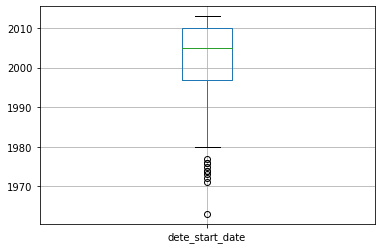

In [19]:
dete_resignations.boxplot(column=["dete_start_date"])

<AxesSubplot:>

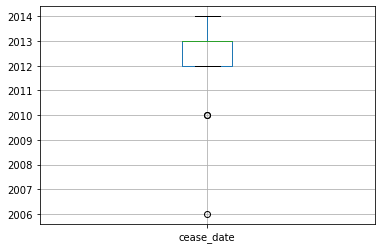

In [20]:
dete_resignations.boxplot(column=["cease_date"])


<AxesSubplot:>

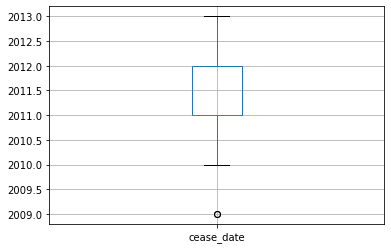

In [21]:
tafe_resignations.boxplot(column=["cease_date"])

Above we can see that for the DETE dataset, most of the start dates are most ~2000, however some are as early as the 1970s or even 1960s. For DETE cease dates, they range from 2006 to 2014 with most between 2012 and 2013[

For the TAFE dataset, we only have the cease dates. We can see thaht they range between 2009 and 2013, however most are in 2011.

# 6. Create a New Column

In [22]:
dete_resignations["institute_service"]=dete_resignations["cease_date"]-dete_resignations["dete_start_date"]

Above we created a new column in the DETE dataset showing how long each employee worked. This is to match the estisting column in the TAFE dataset.

# 7. Identify Dissatisfied Employees

There are several columns we can look at in both datasets that could show dissatisfaction.

In the TAFE dataset, we have "Contributing Factors. Dissatisfaction" and "Contributing Factors. Job Dissatisfaction"

In the DETE dataset, there are a few more such columns. "job_dissatisfaction", "dissatisfaction_with_the_department", "physical_work_environment", "lack_of_recognition", "lack_of_job_security", "work_location", "employment_conditions", "work_life_balance", and "workload".

We created a new "dissatisfied" column and added True to it if the reason for resignation was one of the above and False if it wasn't.

In [23]:
print(tafe_resignations["Contributing Factors. Dissatisfaction"].value_counts())

print(tafe_resignations["Contributing Factors. Job Dissatisfaction"].value_counts())

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64
-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64


In [24]:
def update_vals(val):
    if val == '-':
        return False
    elif pd.isnull(val):
        return np.nan
    else:
        return True

tafe_resignations["dissatisfied"] = tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']].applymap(update_vals).any(1, skipna=False)

tafe_resignations_up=dete_resignations.copy()

dete_resignations_up=dete_resignations.copy()

print(tafe_resignations["dissatisfied"].value_counts())

False    241
True      91
Name: dissatisfied, dtype: int64


In [25]:
print(tafe_resignations["Contributing Factors. Job Dissatisfaction"].value_counts())

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64


In [26]:
print(tafe_resignations["Contributing Factors. Dissatisfaction"].value_counts())

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64
